In [1]:
import pandas as pd
prisoner_survey_data = pd.read_csv('prisoner_survey_dataset.csv')
expanded_donor_data = pd.read_csv('expanded_donor_data_dataset.csv')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



print("Basic Information of Prisoner Survey Data Dataset:")
print(prisoner_survey_data.info())
print("\nBasic Information of Expanded Donor Data Dataset:")
print(expanded_donor_data.info())

# check for missing values
print("\nMissing Values in Prisoner Survey Data Dataset:")
print(prisoner_survey_data.isnull().sum())
print("\nMissing Values in Expanded Donor Data Dataset:")
print(expanded_donor_data.isnull().sum())

# descriptive Statistics
print("\nDescriptive Statistics of Prisoner Survey Data Dataset:")
print(prisoner_survey_data.describe())
print("\nDescriptive Statistics of Expanded Donor Data Dataset:")
print(expanded_donor_data.describe())


Basic Information of Prisoner Survey Data Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   InmateID                       50 non-null     object
 1   Age                            50 non-null     int64 
 2   Gender                         50 non-null     object
 3   Ethnicity                      50 non-null     object
 4   EducationLevel                 50 non-null     object
 5   CrimeCommitted                 50 non-null     object
 6   SentenceLength                 50 non-null     int64 
 7   IncarcerationStart             50 non-null     object
 8   ProjectedRelease               50 non-null     object
 9   PriorOffenses                  50 non-null     int64 
 10  GangAffiliation                50 non-null     object
 11  SubstanceUse                   50 non-null     object
 12  MentalHealthIss

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# define a function to check if the donation meets the criteria
def meets_donation_criteria(row):
    if row['AnnualIncome'] > 100000:
        return row['DonationAmount'] >= 1000
    elif 75000 < row['AnnualIncome'] <= 100000:
        return row['DonationAmount'] >= 750
    elif 25000 < row['AnnualIncome'] <= 75000:
        return row['DonationAmount'] >= 250
    else:
        return True

expanded_donor_data['meets_criteria'] = expanded_donor_data.apply(meets_donation_criteria, axis=1)

print("Proportion of Donors Meeting Criteria:")
print(expanded_donor_data['meets_criteria'].value_counts(normalize=True))

Proportion of Donors Meeting Criteria:
True    1.0
Name: meets_criteria, dtype: float64


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# list of predictors
X = prisoner_survey_data[['Age', 'PriorOffenses', 'SentenceLength', 'ViolenceHistory', 'EducationProgramParticipation', 'MentalHealthIssues']]

# target variable
y = prisoner_survey_data['RelapseRisk']

# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

binary_columns = ['ViolenceHistory', 'EducationProgramParticipation', 'MentalHealthIssues']
encoder = LabelEncoder()
for col in binary_columns:
    X[col] = encoder.fit_transform(X[col])

y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# training the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



<ipython-input-5-2f589b98b326>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = encoder.fit_transform(X[col])
<ipython-input-5-2f589b98b326>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = encoder.fit_transform(X[col])
<ipython-input-5-2f589b98b326>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [6]:
import numpy as np
import random
from math import ceil
initial_amount = 321250
community_chest = initial_amount
prisoners = []
contribution_rate = 0.1  # example rate at which prisoners contribute to the chest
comm_chest=[]


def create_new_prisoner():
    idx = random.randint(0, len(prisoner_survey_data) - 1)
    prisoner_record = prisoner_survey_data.iloc[idx]
    return prisoner_record

# predict relapse risk
def predict_relapse(prisoner_info):
    return prisoner_info['RelapseRisk'] == 'High'

def calculate_salary(prisoner):
    base_salary = 10000
    age_factor = (prisoner['Age'] - 20) / 40
    education_bonus = 500 if prisoner['EducationProgramParticipation'] == 'Yes' else 0
    return base_salary + (base_salary * age_factor) + education_bonus



# simulation loop for 5 years
for year in range(5):
    # add 10 new prisoners each year
    for _ in range(10):
        new_prisoner = create_new_prisoner()
        new_prisoner['RelapseRisk'] = predict_relapse(new_prisoner)
        new_prisoner['salary'] = 0
        prisoners.append(new_prisoner)

    # update each prisoner and community chest
    for prisoner in prisoners:
        if not prisoner['RelapseRisk']:
            prisoner['salary'] = calculate_salary(prisoner)
            community_chest += prisoner['salary'] * contribution_rate


    comm_chest.append(community_chest)
    print(f"Year {year + 1}: Community Chest = {community_chest}")

Year 1: Community Chest = 336150.0
Year 2: Community Chest = 362425.0
Year 3: Community Chest = 402975.0
Year 4: Community Chest = 457675.0
Year 5: Community Chest = 523800.0


<ipython-input-6-056bfce3784a>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_prisoner['RelapseRisk'] = predict_relapse(new_prisoner)
<ipython-input-6-056bfce3784a>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_prisoner['salary'] = 0
<ipython-input-6-056bfce3784a>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_prisoner['salary'] = 0
<ipython-input-6-056bfce3784a>:33: SettingWithCopyWarning: 
A value is trying to b

In [7]:
total_relapsed = 0
total_not_relapsed = 0
total_contribution = 0
salary_data = {'total': [], 'education_yes': [], 'education_no': []}

for prisoner in prisoners:
    if prisoner['RelapseRisk']:
        total_relapsed += 1
    else:
        total_not_relapsed += 1
        total_contribution += prisoner['salary'] * contribution_rate
        salary_data['total'].append(prisoner['salary'])
        if prisoner['EducationProgramParticipation'] == 1:
            salary_data['education_yes'].append(prisoner['salary'])
        else:
            salary_data['education_no'].append(prisoner['salary'])

average_salary = {
    'total': np.mean(salary_data['total']) if salary_data['total'] else 0,
    'education_yes': np.mean(salary_data['education_yes']) if salary_data['education_yes'] else 0,
    'education_no': np.mean(salary_data['education_no']) if salary_data['education_no'] else 0
}

# outputting the analysis results
print(f"Total prisoners predicted to relapse: {total_relapsed}")
print(f"Total prisoners predicted not to relapse: {total_not_relapsed}")
print(f"Total economic contribution to the community chest: {total_contribution}")
print(f"Average salary of all prisoners: {ceil(average_salary['total'])}")
print(f"Average salary of prisoners who did not participate in education programs: {average_salary['education_yes']}")
print(f"Average salary of prisoners who participated in education programs: {average_salary['education_no']}")


Total prisoners predicted to relapse: 10
Total prisoners predicted not to relapse: 40
Total economic contribution to the community chest: 66125.0
Average salary of all prisoners: 16532
Average salary of prisoners who did not participate in education programs: 0
Average salary of prisoners who participated in education programs: 16531.25


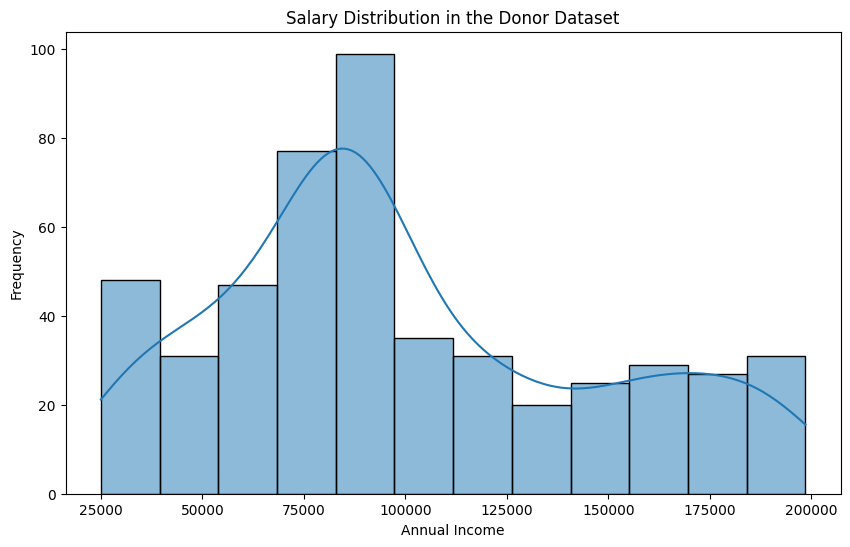

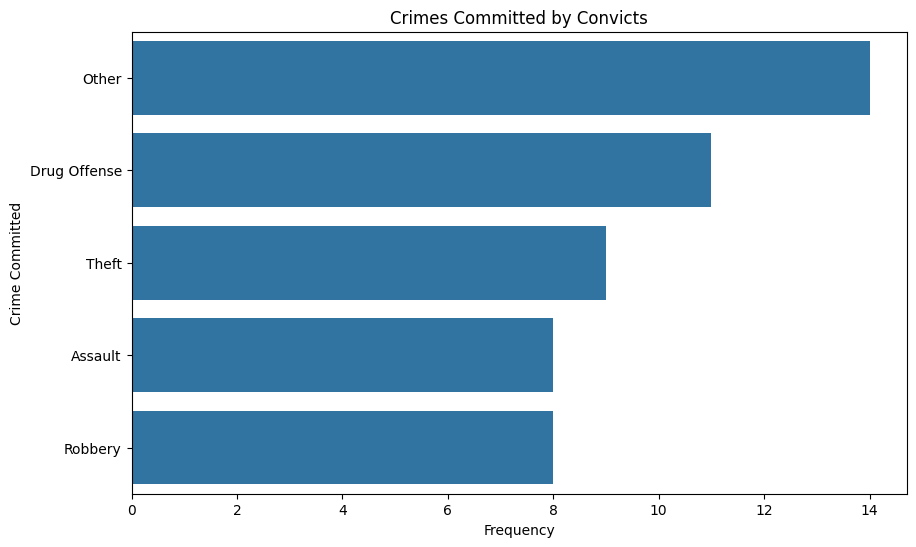

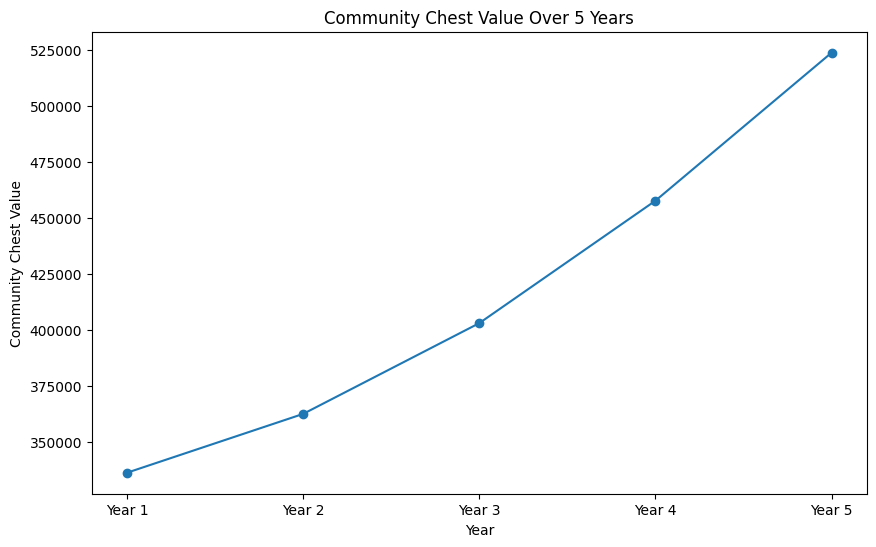

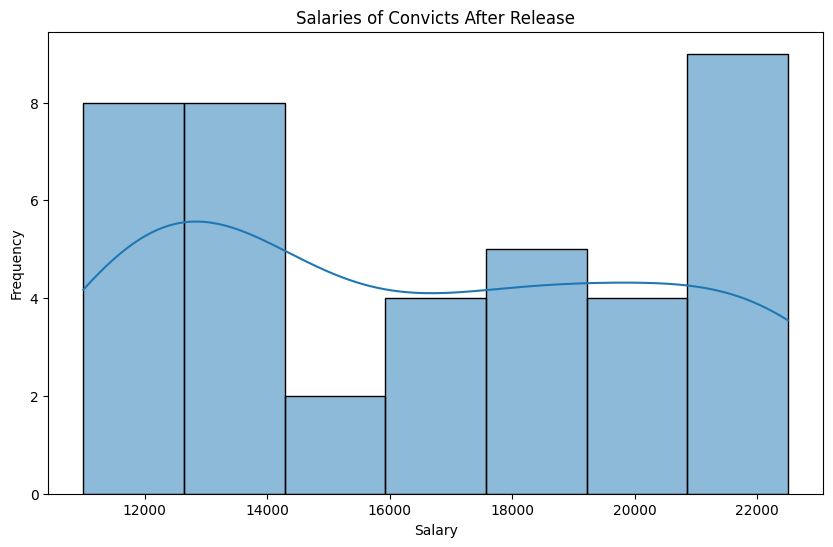

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


# Graph 1: Salary Distribution in the Donor Dataset
plt.figure(figsize=(10, 6))
sns.histplot(expanded_donor_data['AnnualIncome'], kde=True)
plt.title('Salary Distribution in the Donor Dataset')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

print()

# Graph 2: Crime Committed in the Convict Dataset
plt.figure(figsize=(10, 6))
sns.countplot(y='CrimeCommitted', data=prisoner_survey_data)
plt.title('Crimes Committed by Convicts')
plt.xlabel('Frequency')
plt.ylabel('Crime Committed')
plt.show()

print()

# Graph 3: Course of 5 Year Data Points to the Community Chest
years = ['Year 1', 'Year 2', 'Year 3', 'Year 4', 'Year 5']
plt.figure(figsize=(10, 6))
plt.plot(years, comm_chest, marker='o')
plt.title('Community Chest Value Over 5 Years')
plt.xlabel('Year')
plt.ylabel('Community Chest Value')
plt.show()

print()

# Graph 4: Salaries of Convicts After Release
convict_salaries = [p['salary'] for p in prisoners if p['salary'] > 0]
plt.figure(figsize=(10, 6))
sns.histplot(convict_salaries, kde=True)
plt.title('Salaries of Convicts After Release')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()